In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import matplotlib.animation as animation
from matplotlib.colors import Normalize
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib import gridspec

In [11]:
plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 14 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

In [24]:
def eta_animation3D(X, Y, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 8), facecolor = "white")
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, eta_list[0], cmap = plt.cm.RdBu_r)

    def update_surf(num):
        ax.clear()
        surf = ax.plot_surface(X, Y, eta_list[num], cmap = plt.cm.RdBu_r)
        ax.set_title("Surface elevation z(x,y,t) after $t={:.1f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19, y=1.04)
        ax.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
        ax.set_ylabel("y [km]", fontname = "serif", fontsize = 14)
        ax.set_zlabel("z [m]", fontname = "serif", fontsize = 16)
        ax.set_xlim(X.min(), X.max())
        ax.set_ylim(Y.min(), Y.max())
        ax.set_zlim(-2.4, 4.8)
        ax.set_box_aspect((2,1,1))
        plt.tight_layout()
        return surf,

    anim = animation.FuncAnimation(fig, update_surf,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim 

In [10]:
def animation2D(X, Y, u, v, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 5), facecolor = "white")
    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[50, 1])
    # ax1 = fig.add_subplot(111)
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])

    partial = lambda x: x[::5, ::5]
    
    surf = ax1.contourf(X, Y, eta_list[0], vmin=-2.4, vmax=4.8, cmap = plt.cm.coolwarm)
    x, y, U, V = list(map(partial, [X, Y, u[0], v[0]]))
    vel = ax1.quiver(x,y,U,V)
    
    norm = mpl.colors.Normalize(vmin=-2.4, vmax=2.4)
    cbar = mpl.colorbar.ColorbarBase(
        ax=ax2,
        cmap=plt.cm.coolwarm,
        norm=norm,
        orientation="vertical",
    )
    

    def update(num):
        ax1.clear()
        surf = ax1.contourf(X, Y, eta_list[num], vmin=-2.4, vmax=4.8, cmap = plt.cm.coolwarm)
        x, y, U, V = list(map(partial, [X, Y, u[num], v[num]]))
        vel = ax1.quiver(x,y,U,V)
        ax1.set_title("Velocity field u(x,y,t) after $t={:.1f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19, y=1.04)
        ax1.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
        ax1.set_ylabel("y [km]", fontname = "serif", fontsize = 14)
        ax1.set_xlim(X.min(), X.max())
        ax1.set_ylim(Y.min(), Y.max())
        plt.tight_layout()
        return surf,


    anim = animation.FuncAnimation(fig, update,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim 

In [22]:
nt = 2000
n = 160
ny = 80
z = np.loadtxt("./output/z_def.txt")
z = z.reshape(nt,ny,n)
# u = np.loadtxt("./output/u_exact_f.txt")
# v = np.loadtxt("./output/v_exact_f.txt")
# u = u.reshape(nt,ny,n)
# v = v.reshape(nt,ny,n)

x = np.linspace(-3000,3000,n)
y = np.linspace(-1500,1500,ny)
x,y = np.meshgrid(x, y)

KeyboardInterrupt: 

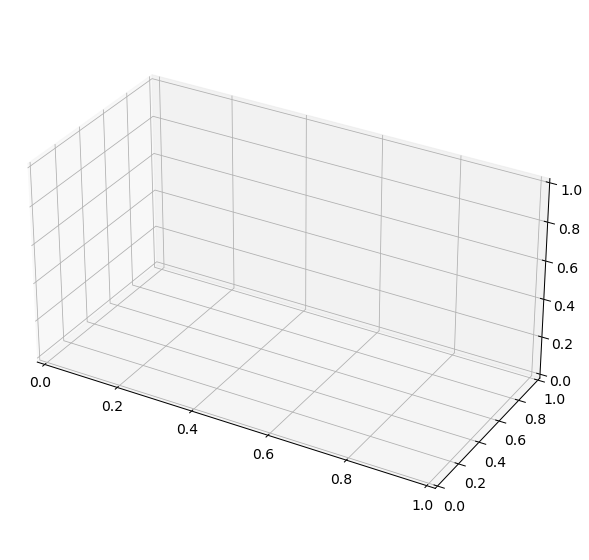

In [25]:
# animation2D(x,y,u,v,z,720,"./fig/anim")
eta_animation3D(x,y,z,720,"./fig/anim")

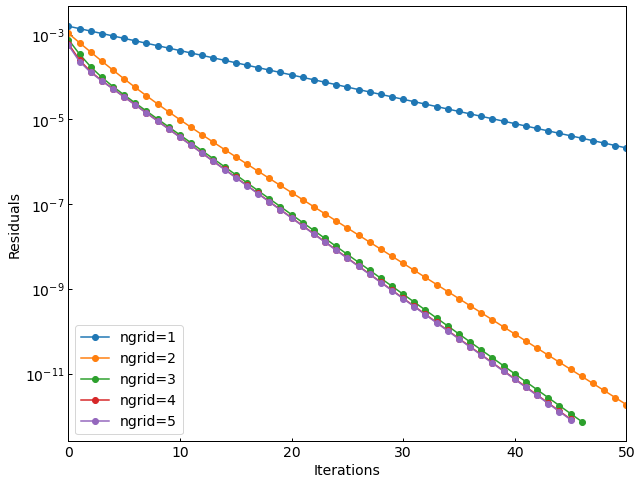

In [21]:
resno=np.loadtxt("./output/resno.txt")
res1 = np.loadtxt("./output/res1.txt")
res2 = np.loadtxt("./output/res2.txt")
res3 = np.loadtxt("./output/res3.txt")
res4 = np.loadtxt("./output/res4.txt")
fig,ax = plt.subplots(figsize=(10,8))
ax.set_yscale('log')
ax.plot(resno,'o-',label="ngrid=1")
ax.plot(res1,'o-',label="ngrid=2")
ax.plot(res2,'o-',label="ngrid=3")
ax.plot(res3,'o-',label="ngrid=4")
ax.plot(res4,'o-',label="ngrid=5")
ax.legend(loc='lower left')
ax.set_xlim(0,50)
ax.set_xlabel("Iterations")
ax.set_ylabel("Residuals")
# plt.savefig("./fig/res_history.png")
plt.show()

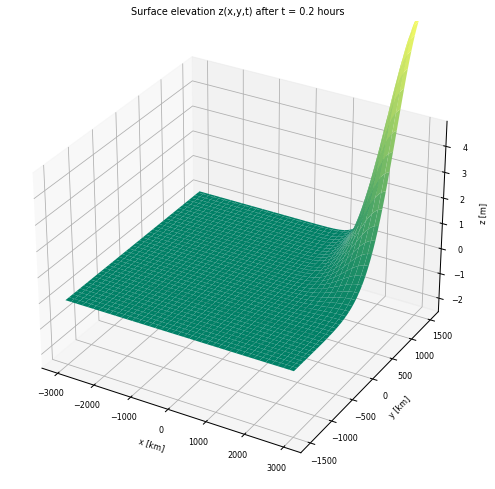

In [52]:
# nt = 1000
# n = 160
# ny = 80
# # fig,ax = plt.subplots()
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111,projection='3d')
ax.set_position([0.1,0.1,0.8,0.8])
ims = []
# z = np.loadtxt("./output/z.txt")
# z = z.reshape(nt,ny,n)
# x = np.linspace(-3000,3000,n)
# y = np.linspace(-1500,1500,ny)
# x,y = np.meshgrid(x, y)
for i in range(2):
    # im = ax.imshow(z[i],vmin=-4.8,vmax=4.8)
    ax.set_zlim(-2.4,4.8)
    ax.set_box_aspect((2,1,1))
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    ax.set_zlabel('z [m]')
    ax.set_title("Surface elevation z(x,y,t) after t = {nt} hours".format(nt=i*0.2))
    im = ax.plot_surface(x,y,z[i], cmap = "summer")
    ims.append([im])
    
im
ani = animation.ArtistAnimation(fig,ims,interval=50)
ani.save('./fig/anim.gif')
plt.show()

cycle =  1


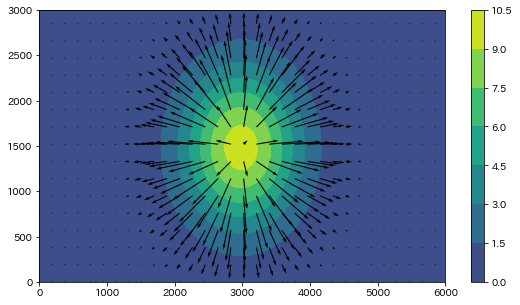

cycle =  2


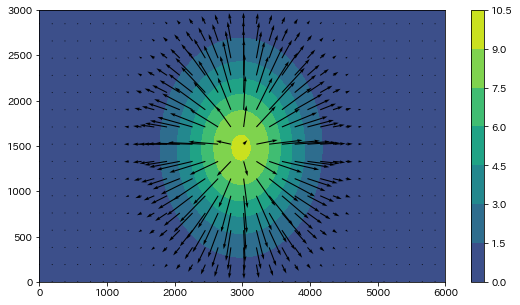

cycle =  3


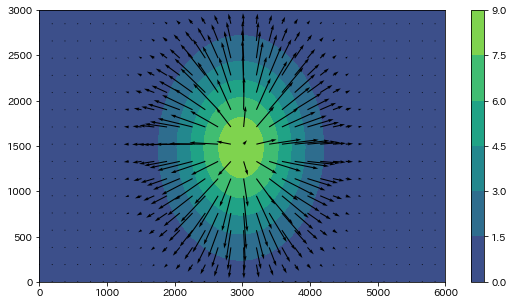

cycle =  4


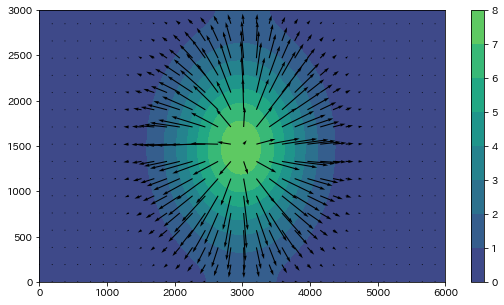

cycle =  5


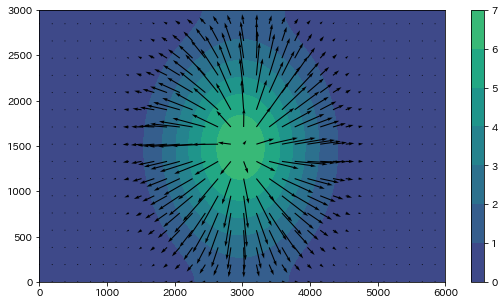

cycle =  6


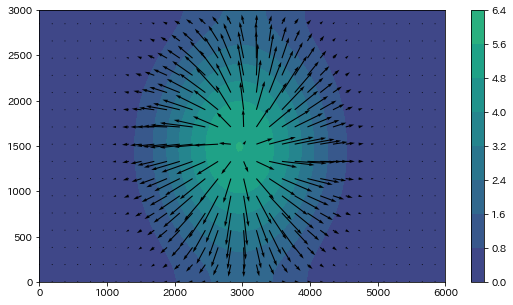

cycle =  7


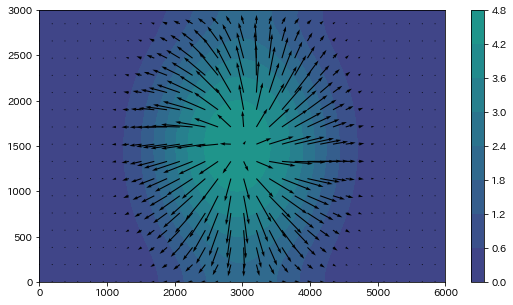

cycle =  8


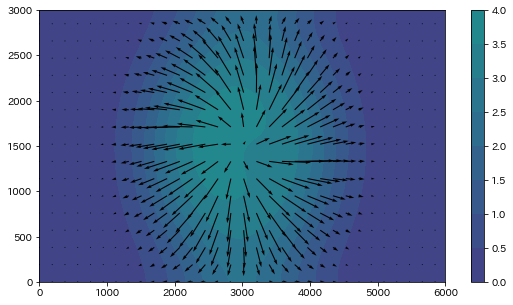

cycle =  9


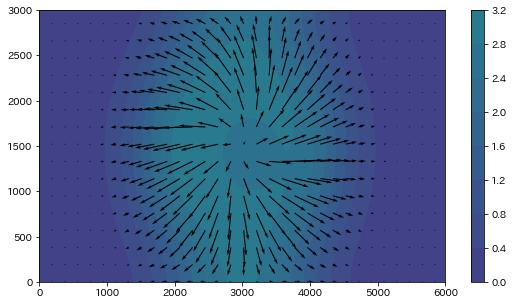

cycle =  10


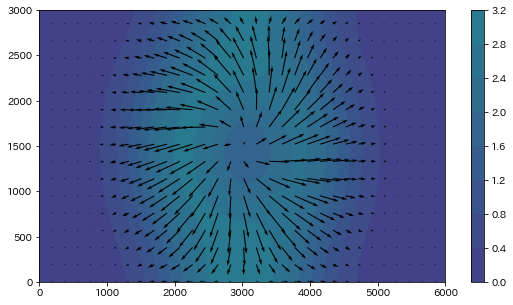

In [19]:
# nt = 100
# n = 160
# ny = 80
# # n = 48
# # ny = 24
# u = np.loadtxt("./output/u.txt")
# v = np.loadtxt("./output/v.txt")
# z = np.loadtxt("./output/z.txt")
# # um = np.loadtxt("./output/um.txt")
# # vm = np.loadtxt("./output/vm.txt")
# # zm = np.loadtxt("./output/zm.txt")

# u = u.reshape(nt,ny,n)
# v = v.reshape(nt,ny,n)
# z = z.reshape(nt,ny,n)
# # um = um.reshape(nt,ny,n)
# # vm = vm.reshape(nt,ny,n)
# # zm = zm.reshape(nt,ny,n)
# print(z.max())
# x = np.linspace(0,6000,n)
# y = np.linspace(0,3000,ny)
# x,y = np.meshgrid(x, y)
# # x, y = np.mgrid[0:n, 0:ny]
# partial = lambda x: x[::5, ::5]
# # partial = lambda x: x[::1, ::1]

for i in range(10):
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,2,1)
#   ax2 = fig.add_subplot(1,2,2)
    X, Y, U, V = list(map(partial, [x, y, u[i], v[i]]))
	# Z = map(partial, z[i])
    print('cycle = ', (i+1))
    cntr1 = ax1.contourf(x,y,z[i],vmin=-2.4,vmax=10.8)
#   ax2.contourf(x,y,zm[i])
    ax1.quiver(X,Y,U,V)
#   ax2.quiver(X,Y,UM,VM)
    fig.colorbar(cntr1, ax=ax1)
    plt.show()

cycle =  1


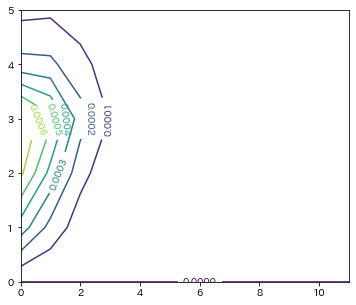

cycle =  2


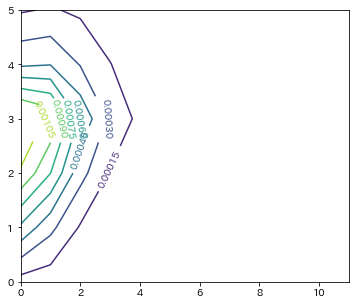

cycle =  3


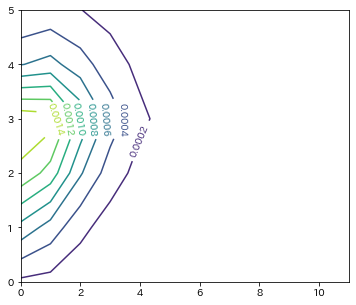

cycle =  4


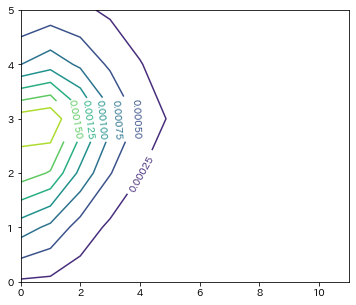

cycle =  5


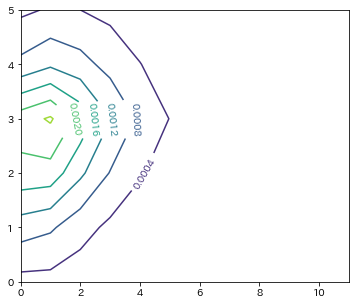

cycle =  6


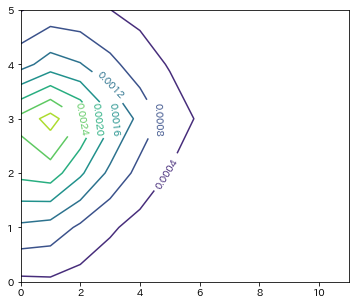

cycle =  7


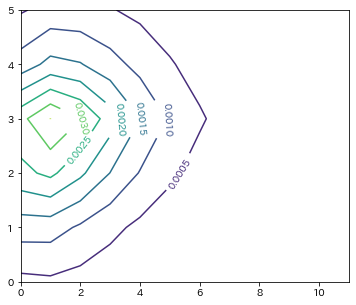

cycle =  8


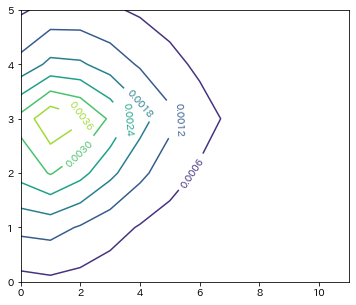

cycle =  9


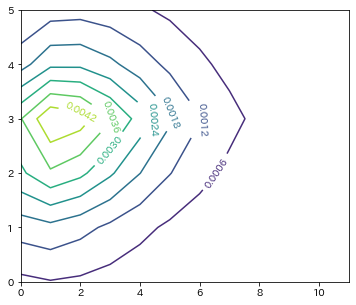

cycle =  10


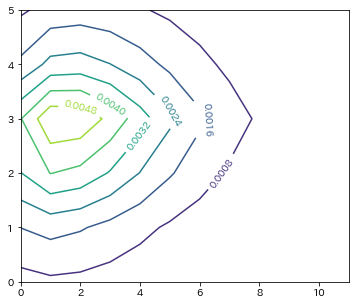

cycle =  11


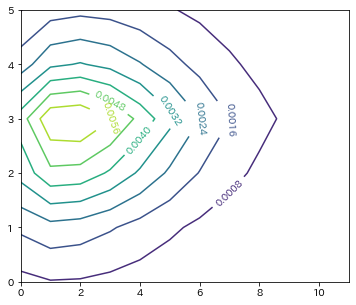

cycle =  12


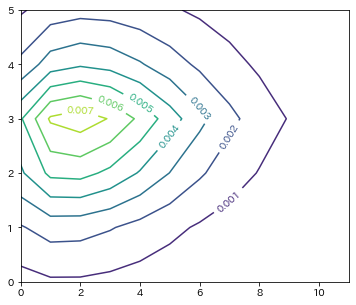

cycle =  13


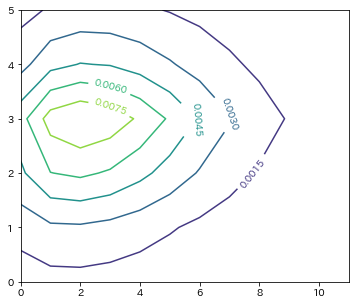

cycle =  14


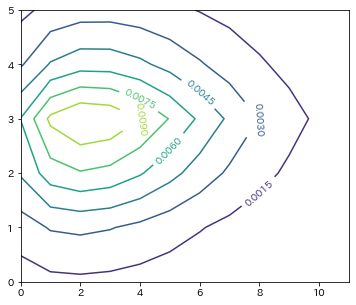

cycle =  15


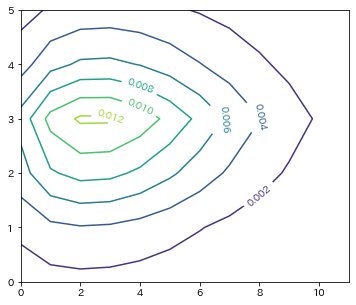

cycle =  16


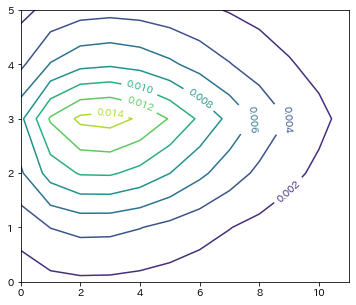

cycle =  17


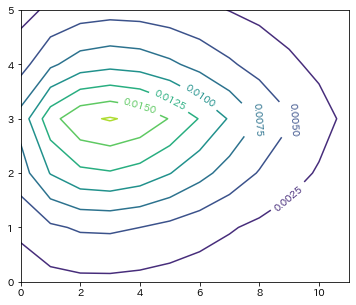

cycle =  18


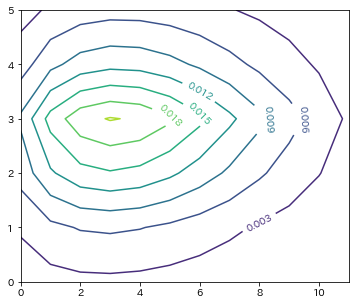

cycle =  19


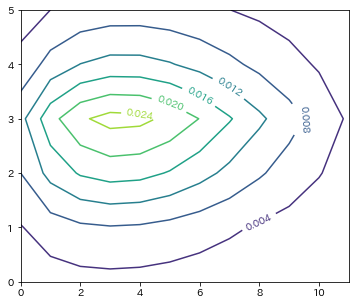

cycle =  20


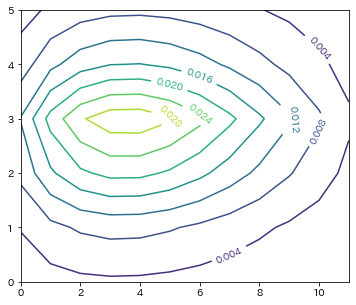

cycle =  21


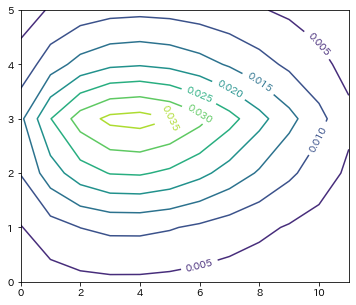

cycle =  22


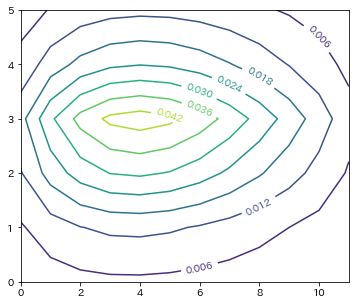

cycle =  23


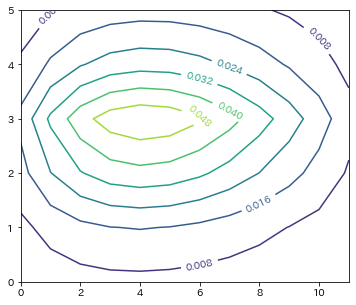

cycle =  24


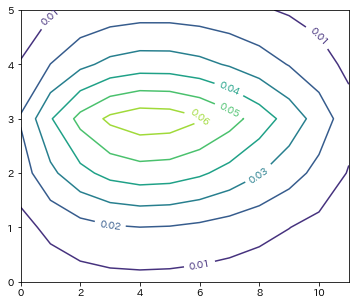

cycle =  25


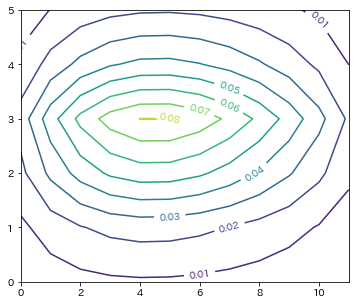

cycle =  26


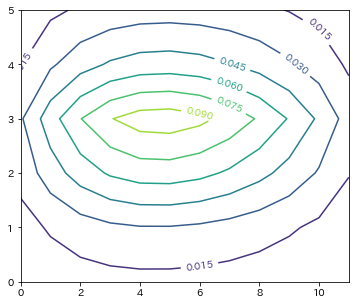

cycle =  27


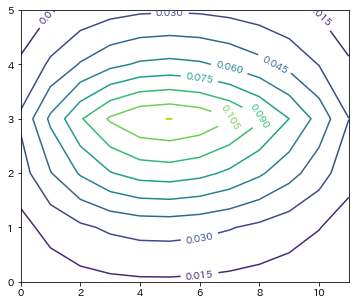

cycle =  28


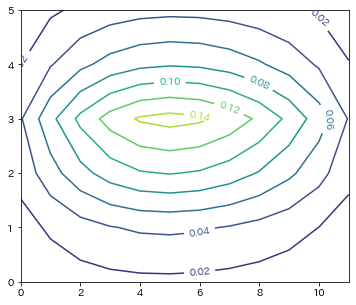

cycle =  29


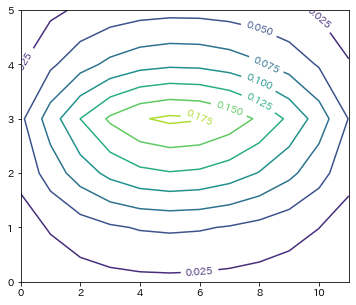

cycle =  30


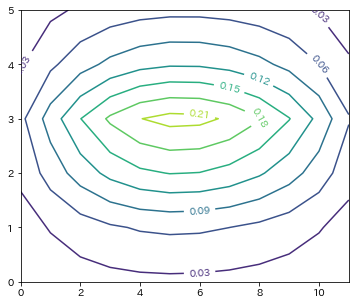

cycle =  31


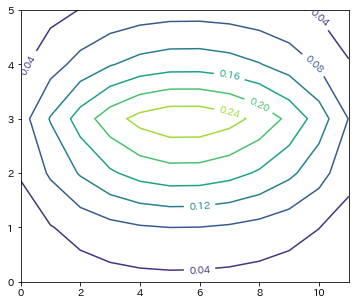

cycle =  32


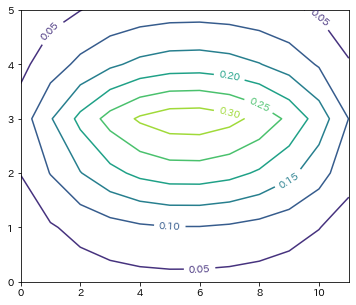

cycle =  33


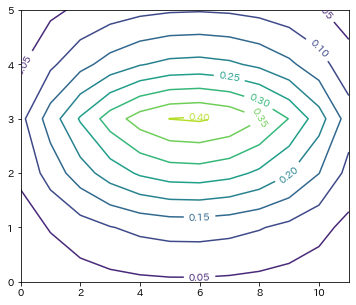

cycle =  34


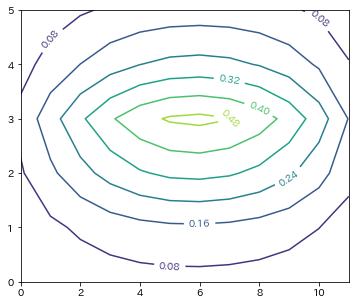

cycle =  35


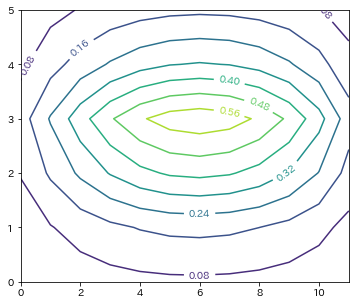

cycle =  36


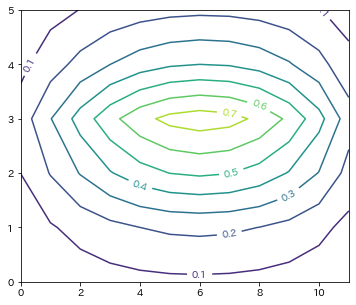

cycle =  37


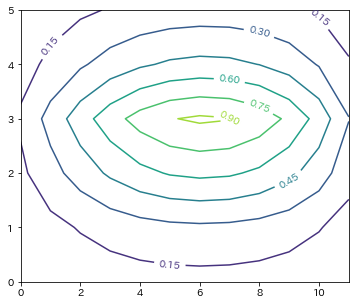

cycle =  38


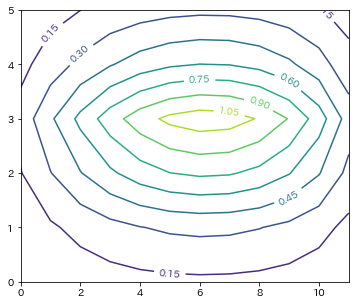

cycle =  39


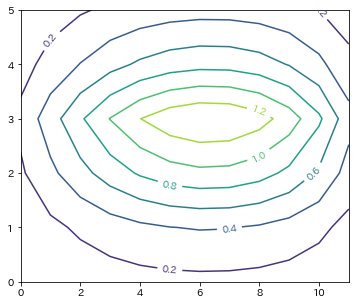

cycle =  40


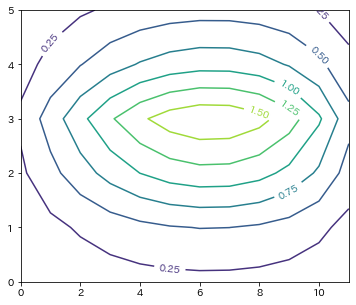

cycle =  41


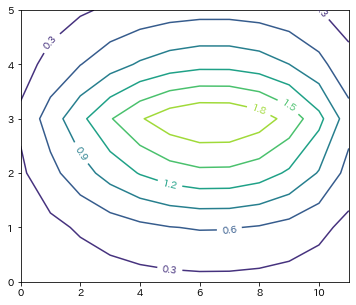

cycle =  42


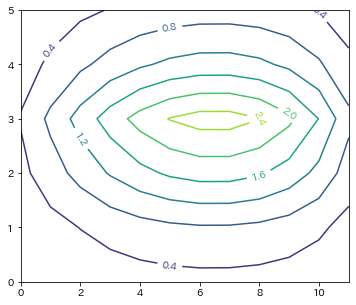

cycle =  43


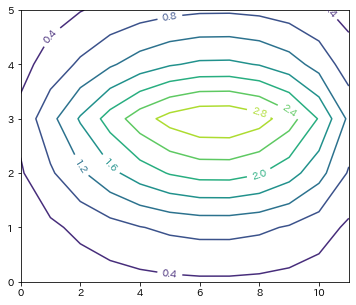

cycle =  44


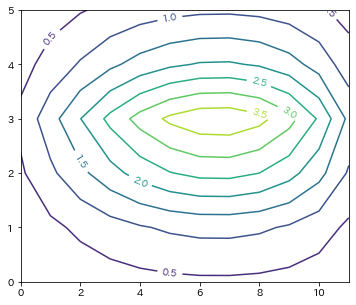

cycle =  45


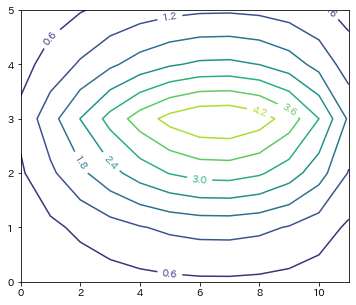

cycle =  46


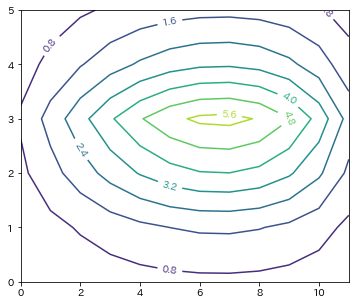

cycle =  47


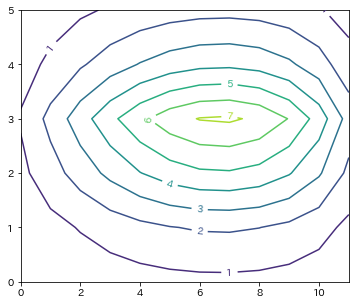

cycle =  48


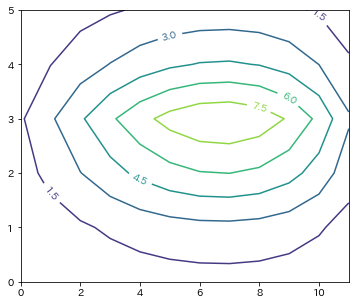

cycle =  49


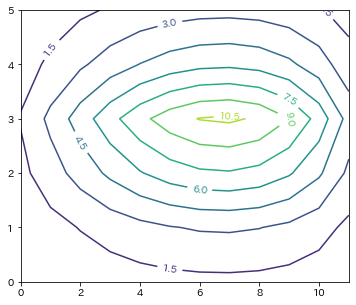

cycle =  50


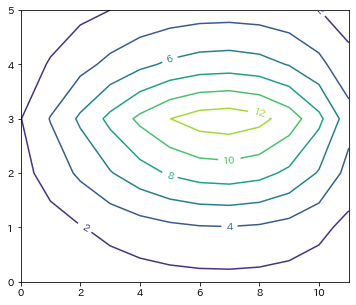

cycle =  51


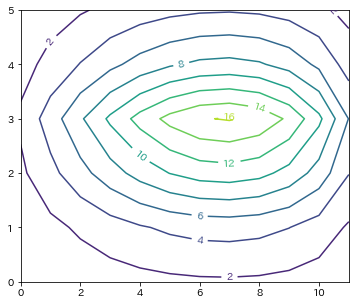

cycle =  52


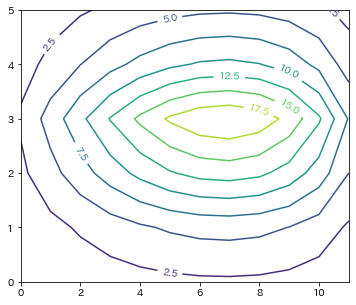

cycle =  53


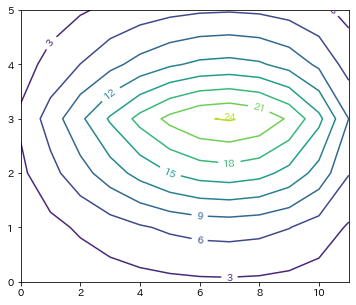

cycle =  54


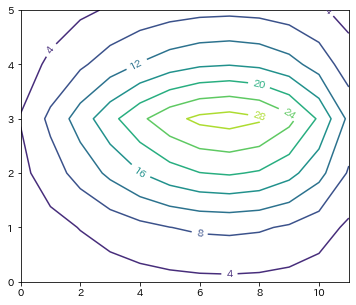

cycle =  55


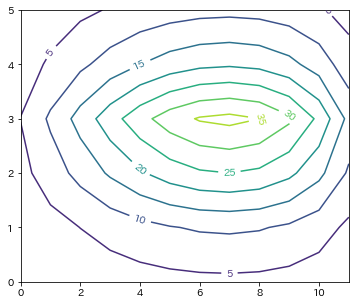

cycle =  56


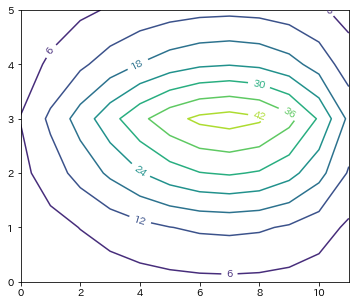

cycle =  57


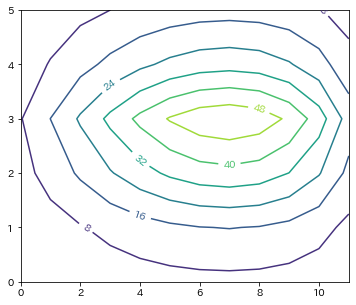

cycle =  58


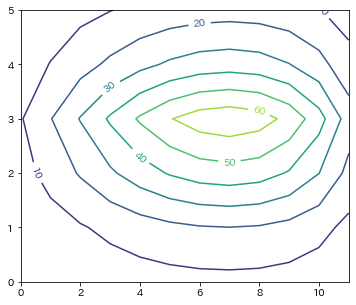

cycle =  59


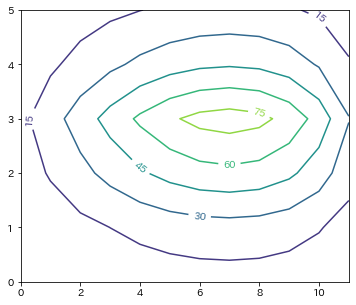

cycle =  60


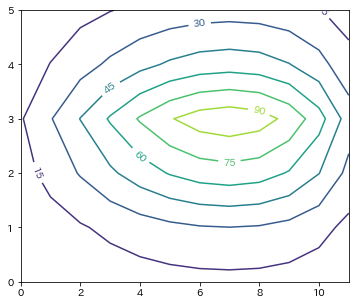

cycle =  61


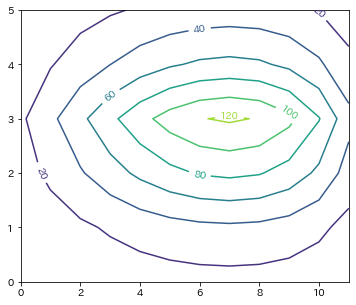

cycle =  62


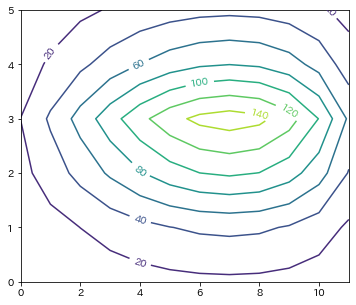

cycle =  63


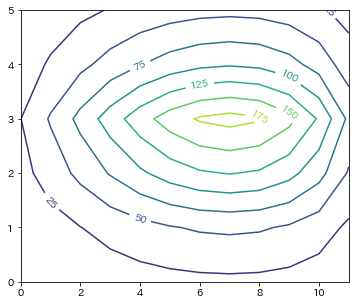

cycle =  64


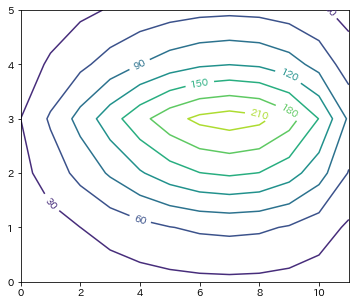

cycle =  65


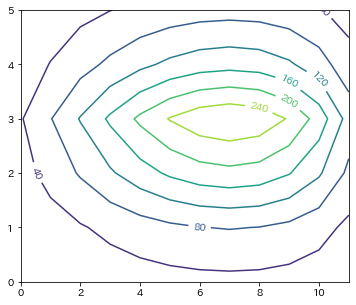

cycle =  66


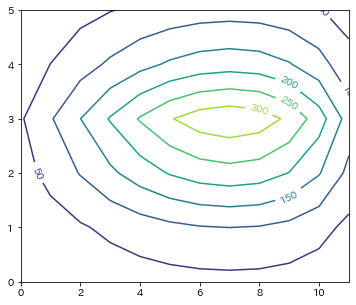

cycle =  67


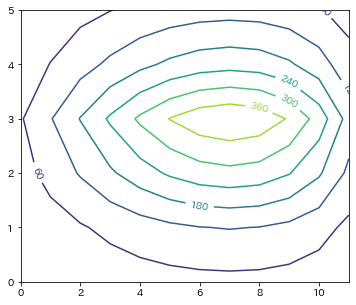

cycle =  68


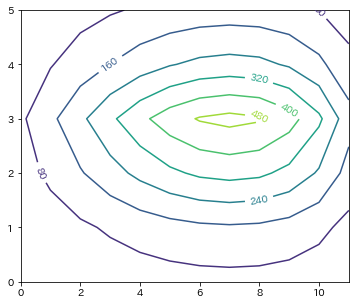

cycle =  69


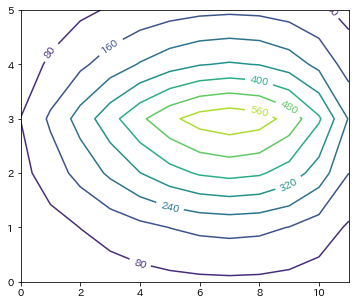

cycle =  70


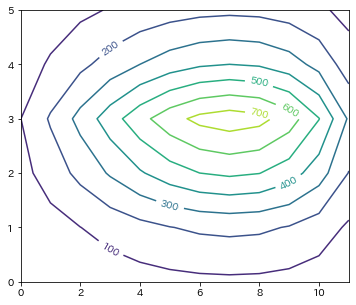

cycle =  71


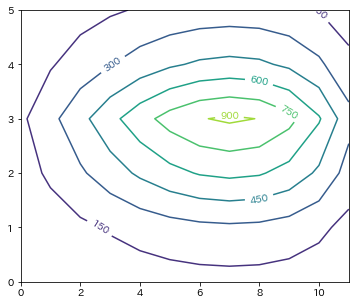

cycle =  72


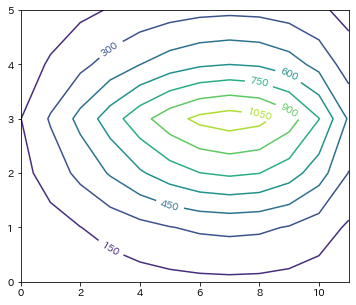

cycle =  73


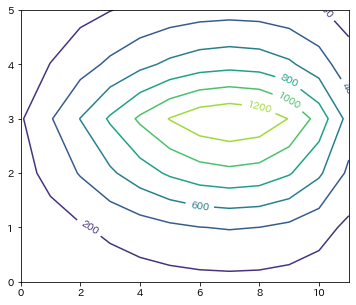

cycle =  74


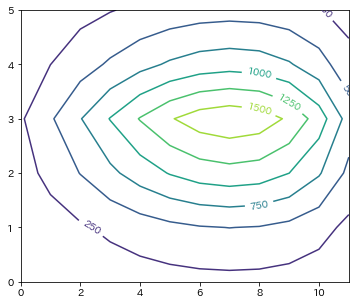

cycle =  75


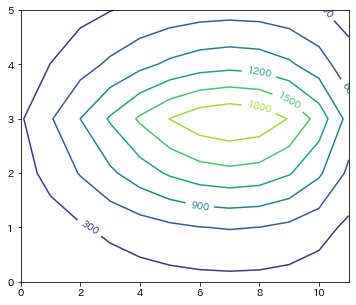

cycle =  76


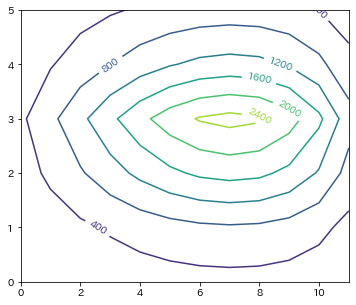

cycle =  77


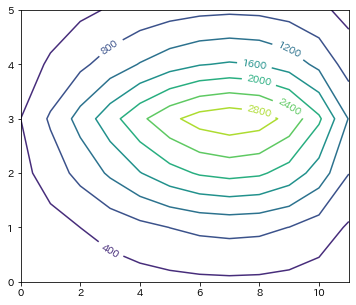

cycle =  78


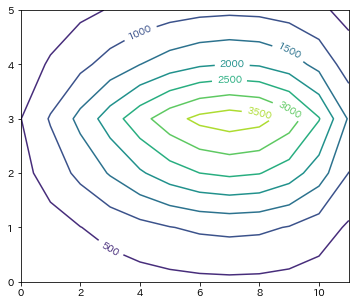

cycle =  79


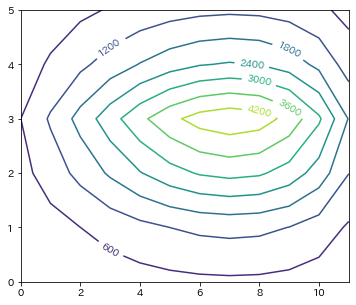

cycle =  80


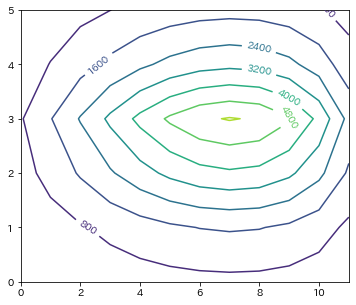

cycle =  81


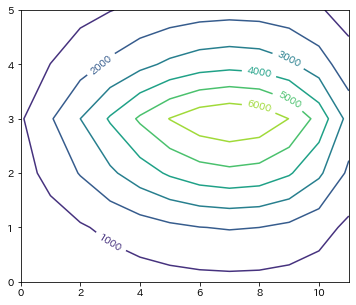

cycle =  82


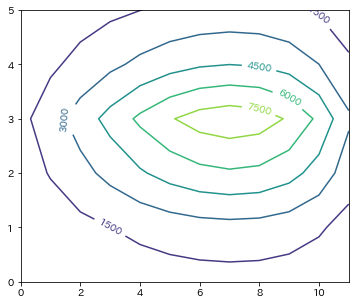

cycle =  83


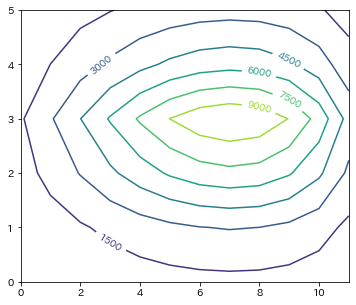

cycle =  84


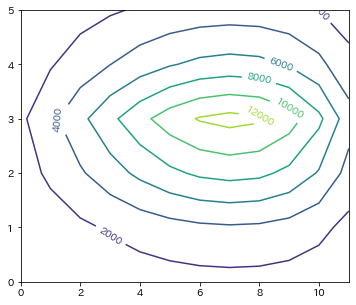

cycle =  85


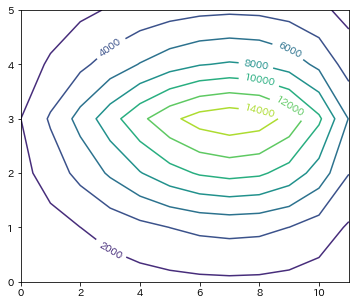

cycle =  86


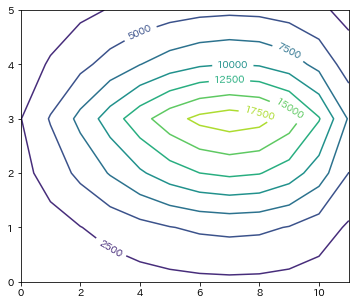

cycle =  87


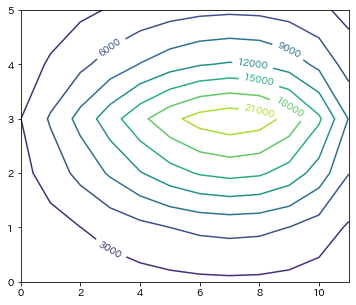

cycle =  88


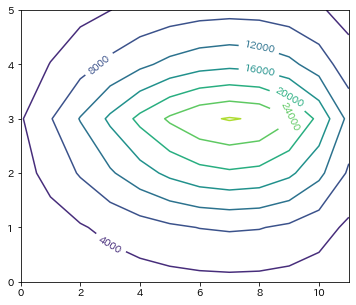

cycle =  89


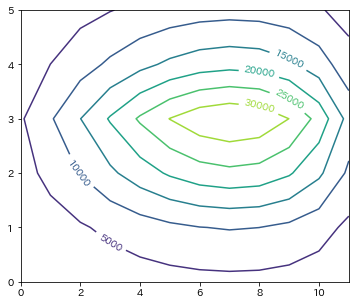

cycle =  90


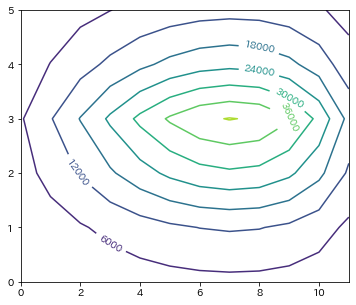

cycle =  91


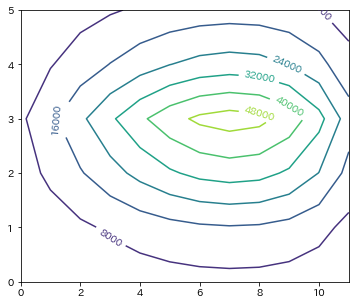

cycle =  92


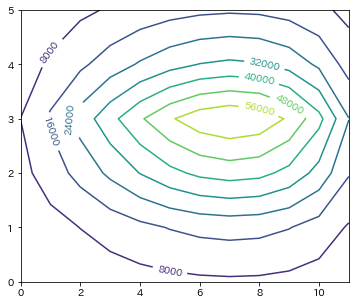

cycle =  93


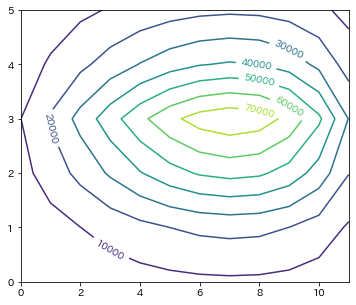

cycle =  94


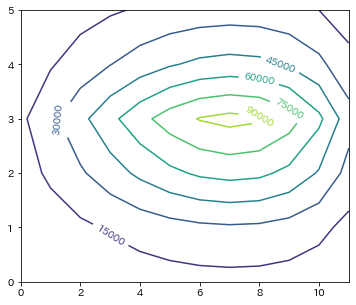

cycle =  95


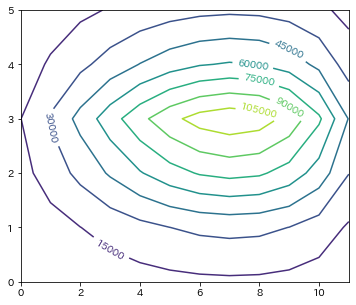

cycle =  96


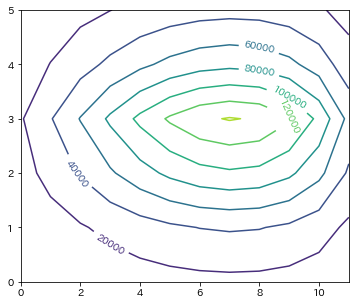

cycle =  97


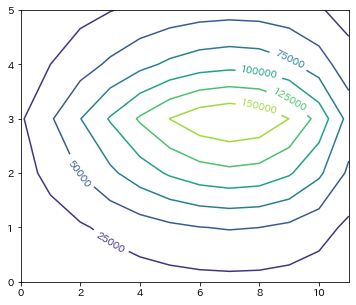

cycle =  98


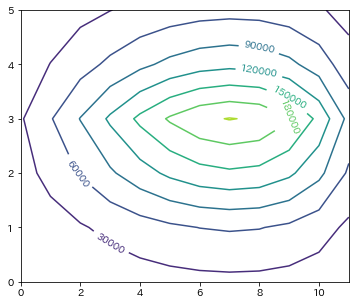

cycle =  99


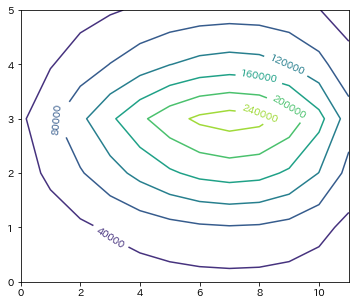

cycle =  100


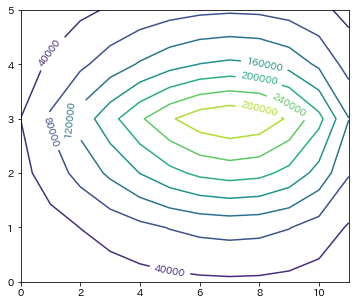

In [35]:
nt = 100
nx = 48
ny = 24
nx1 = int(nx/4)
ny1 = int(ny/4)
nx2 = int(nx/2)
ny2 = int(ny/2)
nx3 = int(nx)
ny3 = int(ny)
# u = np.loadtxt("./output/u1.txt")
# v = np.loadtxt("./output/v1.txt")
z = np.loadtxt("./output/z7.txt")
# z1 = np.loadtxt("./output/z1.txt")
# z2 = np.loadtxt("./output/z2.txt")
# z3 = np.loadtxt("./output/z3.txt")
# z4 = np.loadtxt("./output/z4.txt")
# z5 = np.loadtxt("./output/z5.txt")
# z6 = np.loadtxt("./output/z6.txt")

# u = u.reshape(nt,ny,n)
# v = v.reshape(nt,ny,n)
z = z.reshape(nt,ny1,nx1)
# z1 = z1.reshape(nt,ny1,nx1)
# z2 = z2.reshape(nt,ny2,nx2)
# z3 = z3.reshape(nt,ny3,nx3)
# z4 = z4.reshape(nt,ny1,nx1)
# z5 = z5.reshape(nt,ny2,nx2)
# z6 = z6.reshape(nt,ny3,nx3)
for i in range(nt):
# for i in range(10):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,3,1)
#     ax1 = fig.add_subplot(1,3,1)
#     ax2 = fig.add_subplot(1,3,2)
#     ax3 = fig.add_subplot(1,3,3)
    cs = ax.contour(z[i,:,:])
#     cs1 = ax1.contour(z1[i,:,:])
#     cs2 = ax2.contour(z2[i,:,:])
#     cs3 = ax3.contour(z5[i,:,:])
    ax.clabel(cs)
#     ax1.clabel(cs1)
#     ax2.clabel(cs2)
#     ax3.clabel(cs3)
    # plt.pcolormesh(z[i])
    print('cycle = ', (i+1))
    # plt.xlim(0,5)
    # plt.ylim(9,15)
#     plt.colorbar()
    plt.show()

(0.0, 50.0)

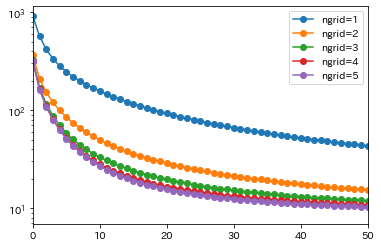

In [48]:
resno=np.loadtxt("./output/resno.txt")
res0 = np.loadtxt("./output/res0.txt")
res1 = np.loadtxt("./output/res1.txt")
res2 = np.loadtxt("./output/res2.txt")
res3 = np.loadtxt("./output/res3.txt")
plt.yscale('log')
plt.plot(resno,'o-',label="ngrid=1")
plt.plot(res0,'o-',label="ngrid=2")
plt.plot(res1,'o-',label="ngrid=3")
plt.plot(res2,'o-',label="ngrid=4")
plt.plot(res3,'o-',label="ngrid=5")
plt.legend()
plt.xlim(0,50)